<a href="https://colab.research.google.com/github/sjarunvenkat/newsguardian/blob/main/newsguardian_1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><b> 🧰🧰 NEWSGUARDIAN 1.0.0 🧰🧰</b></h1>

## 📰 Enter Newsguardian 1.0.0, your very own source of real-time and dynamic fact checking and fake news detection tool. 

\

## 📰 Newsguardian is  a real time fake news detection with several layers of functionalities. This is done keeping in mind the useful nature of the given solution in preserving integrity and the field of journalism. The advantage of automated detection systems is in its automation and scalability. 






## 🎉 We welcome you to the Colab Notebook!

### 🟥 **The functionalities of Newsguardian is demonstrated in the below schematic diagram.**

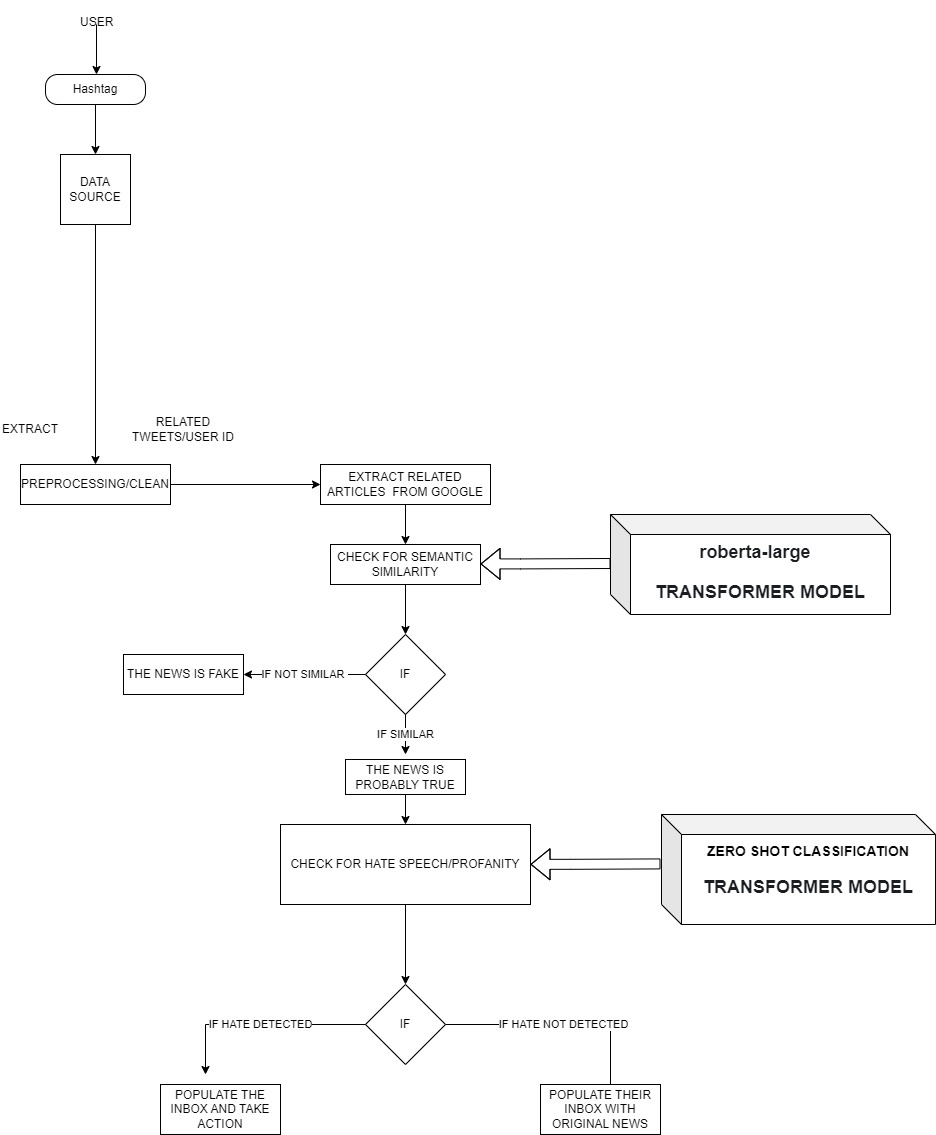


This tool has 3 main functionalities.

\

- **Fact Checking** : The model starting with a given query using which will be run against millions of documents that are present in the web, i.e scraping the Internet for documents related to the given query.  The query will be pit against the generated search results only to then calculate the ***semantic similarity score*** that is based on the pure context of both the sentences. If the score is greater than the threshold value, then the result is assigned a higher probability of being Real and vice versa.

 *Note that the threshold value is subject to change as per the domain, the relevance and the number of results generated per query.*

\

- **Profanity detection** : The word profanity primarily refers to any unparliamentary words that exist however, the model would also detect ***hate speech, slurs, words that are acting by anti-national sentiments***.

\

- **Spamming the spammer** : We try to text the spammer back with the original authenticated news which is specified as per the problem statement. 

##SO LET'S START!!

## 🍀 **Part I - Fact Checking / Fake News Verification**

### 🟨 Installing all the required libraries



In [ ]:
!pip install -q sentence_transformers
!pip install -q googlesearch_py
!pip install -q sumy
!pip install -q transformers
!pip install -q spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.8 MB/s eta 0:00:0

### 🟨 Initializing all the required libraries

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from googlesearch import search
import requests
import spacy
from bs4 import BeautifulSoup
from sumy.parsers.html import HtmlParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### 🟨 Downloading the Transformer pretrained weights

####🤖  A transformer model is a type of neural network architecture used for natural language processing (NLP) tasks such as language translation, text classification, and question answering.

\

####🤖 The transformer model is composed of an encoder and a decoder. The encoder takes in the input sequence and generates a hidden representation of it, while the decoder takes the encoder's output and generates the output sequence. Both the encoder and decoder consist of multiple layers of self-attention and feedforward neural networks.



In [ ]:
model = SentenceTransformer('stsb-roberta-large')

####🤖 The transformer model we used here is known as "RoBERTa" which has been used in the STS (semantic text similarity) task, which involves determining the degree of semantic similarity between two sentences.

![The-RoBERTa-model-architecture.ppm](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAs4AAAG7CAMAAADkNePxAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAMAUExURcPV95m9wQAAANvb26/Rn6udz/HFx/////2jQOvr68vLy5ubm+Xl5XBwcPPz89/f38fHx3Z2du3t7bXD4oGBgbvN7IuRm6e1zfehQHp+iXZsYmpscHJ2fIuNj2hiWnh6fLW1tfn5+bKysgICAmRkaLq6uk5OTggICXd3eOfn58nJyWdqap+Tv1tbW+/v72xvapW2uqurqxQVFtHR0Q8QEfz8/MTExISXe19fX76foYqKipeHh42lg3t7e6aPj2pwcq3Pn2JkYM2rq6CgoJ2fnXRwfp2bm42JiQwLCgYFBVNTU35/gZCQkDY0NGdnZ5CdtdjY2MDAwJiYmCUmKq2urpSUlD5DSkxMTFdXV3R1dBgZHL7P8PX19R0gI6q51mhyhNPT0zExPbKUlIefe93d3YODgyguLFdcbNXV1eHh4RESFDQ3PYeHh7nK6b29vUBBQRANCTg9Rk0xFGRceT5ET+Pj4zs7OxkWE4SDiE9FRZ+tyBwdHGRkZFVOaOnp6cLU9c3NzanMm52dnS8xL3B0eiswNk1ZYXWBlq+/2YZ8nqmbzEdHWI+us4ajqKOjo4SPpnF7kN63t4yZsHJycuqXO0ZGRqenp7DA3iMiIrh2Lre3t2VBGY2Njd+RPPqhP5FdJKOyzpuOu6mpqWBmeExTYG5ubc+GNWx7h3p3dpimwJ6cwFhrb6PBlTYjDaupqXdMHT1KTnZ0eIV8d6WlpXuTl8N+M0hISNaKNkQ8TfHx8UU4OdixsjpGNZOxhvafPW1shkdQWu7DxFg4Fn+XoGd7XXOKjcikpjApLldkbqpsKnyLloFSIHiRbp++kXJiX2uAapm7wDE8PisnJ0A9PVJPT7LD4SYYCZSIsYBoaH6Jnn6YjGZcVpmCiHZ4dHxqVot/qGBca6iLjEIqEFpsUmJ0WI9/gE5eUmBoeUtaRei9vnqFmJ9oLLmZmeK5uoZyc25tcJp8bmFqeq3Rn3xzk3uMdZy6j8moqmZ0d2FPT3xwb5e0jEZUQHl8hJmzjaWXx6OFh91c3bAAACAASURBVHgB7b0LXBRXmvffHMCiRYQoTjI7O+8CFWguaSdAyzBs2I3h3XdpBOQiii2oJIqKgBBvE0Ea9cUkXpB4xWsUNY6fJBt3TIw6iVFzH5OMd5PP7GwmydziZGYTMvNO/jO7yf85demuqq7urqqu6q5u6ohdp855zqlT53z710+dupkIIxg9EDE9YIqYPTF2xOgBwsDZgCCCesDAOYIG09gVA2eDgQjqAQPnCBpMdlcWFaSnZ09k10bS0sA50kZ73LTMKWtzh2py+s9E2q753x8DZ/99FFYWaZVDY6gGp+YWzwurlqvRWANnNXpRN3Usao03uxqTtG2RKz5CIgbOkTTQo3OqubtTPX8Sd3UExA2cI2iQq7dV8femfyd/PeLXDJwjZ4jbM2mv2b1Hk4R8u7MiM2bgHDHjWjAzy2Nfqus8kiI6wcA5UoZ3bk6iyK5MmSuSGLlJBs4RMrZZCflie1IwsuTZwFkMgjBMa00Xb/TImqwzcBanINxSS/q9tHharpeMiEw2cI6IYU0v8rYbPTO95URiuoFzJIxq1VHPSQ12v4p62dgIWBo4R8Agp05J8r4X7SXe8yIux8A5Aoa05KSPnZiY4CMz0rIMnMN/RJOSfe5D61yf2RGVaeAc9sM5LiHa5z6kDPnMjqhMA+ewH86aNN+7kOhbvH0XDrNcA+cwGzCP5ha0eiQJEhLMgoTIXTVwDvOxnZjg956TuqQw30fpzTdwlt5XurRcO81vs9J9TXz4LR1WBkKcs8rjjRBGPTC/239j93XHl+eHFZWKGyvEOaUu2whh1AMJQxIaW1h9slwxIWFVUIhzmp/D5LDauchvbNpaKftYNDc7Xopd+NsIcU7x74qF/05HzB6MyRknZV+G9oxUnA11lsKHXmxq9khqSXbNSMXZUGdJgOjDqFfiCZKe4tEj1Nkw1FkfpEpqRXKvJDOCyKkeoTgb6iyREB2YtUu+D7B12gjF2VBnHXAqrQmpab4vPeLU0h8/QnE21JlDgb6j07zdHujZ7OqiEYqzoc6eMOgzZVyl9CuLojNHKM6GOusTXs9W9cs4Q9BQOUJxNtTZExxdpixKaJDRrsoRepLbUGcZkITStMbLY2LE25Tp9cEF4vbhmio8yU2pc24ZBGtCu7ed8jyinuz9GsRMRhiicaVl3a2jubWW4LSE+LGQloajEOoJYj61vCM+lTBTSfjD+5333PpGTHxhsaxdbZ0iyzxsjYU4U+qcjE7NmLFkEHm5Bzj5msfudnnvrgorbZ2ElkyePHmJ3T7EKZ2AZszYsc6+rocgitCOGThkEMQpG1hau9C1sT2QUEFWwKeBM6fbCGJfAW/V30rNHf4sIiNfiDOlzsnoDOxdaj2qEt3J+hWiyV4S3ThTj5c647jKMUwg8UoSgt/CIgRM0+FUM7UsQhT56UjW7ypbSUQvs1vl7d7QUXn24WotxJlRZ4wzkY76ifKqmjvywROYmeAS1dx1g0VZo+OjE8AZ6G3tzkwB07oCwlx0ZuhoMdgSxOgplXXYfyCqM6dEC3AmjqKJBDG2rrIY6wuNM+HoFsN5HP3zwOCcUtydTNWOKx7pQW5PpEMHByMspNzEypMNwdiYyDaEOHPUmWhFewjbEruthqhH1wptMybR5Vu78urnlXfV5nVNqrNf6x5E8wkir5iYi2bYyros2QRRTtZWDtYuBx8YVdTn5bmcDUqdx67LI4jlXV3dp0hw/2ic0xFMOnmqcwmqw1ukca4vnWHNs7eL7MIITJJ+epvpnGxmELTuq2oEjuGOdWhFqtZbEq9fiDOjznMTE+f25zU2ELa8MZNS+1EaQeQjdu4SOxvlqJhoSG3BX/oVgwzOO+DQzVZJRNsTCOLMoJXIJgHHNOTCuay4ONM6iH3nU4PjMOxJRAJasWLFIPY1AOclO3CArZzKKy4uPnoKVVCdQuGcTZ4ETbcESWTE+0o3qZNmzpPZluxClycns6Q882oSSMF0sKzIKx6wtRBnRp0RBLICftttGMZTg2MbGhoqTjFbo3GOhrWx8KMyryyPwbkfUirKiCKyCqy3lRJFLZMgpdaFc9e6q3Zy5kLwyu37ICMR3QE4d3dPntHVCKpbhMqsOAC2p+zr1uWhdSW4OKvOZoKYlD9YRqWM9I+0Erk9kF0J3R6EUI2FjyAa7CHSHSHOjDqnVFf3AkCAczF81GK6EaolWkpLS+MJGmfMWuLRdaWleS0MzumQsiSDqKSt0ZjCdZBAnHLhDM5G9OBVqLaK3umrZYyz0XDN4eFsTJpCluPiLM4F9bX2vFIDZ+iQRcmypTZ7Gz5S0T4U0CObhDK135bYFoQ4M+pMHQpiexu+QnzdimgcEon5ycnJ2QzOkD6uq3ZfdupRFmeQWGLHDCKhdCFlPmkbeCEAOBdnIt9+bRIxBoEEE8TgNvZQsA7le/rO9eQebEX7zgX2HWuriHUGztAhuTupfpHzkZ1JqaacIopsq1F8YmLVngp7vqLiARcS4syd2cCVUzhbySz4qa+sYbZGqzOs5KJs+LxmY9QZ47xkBrEW4WO+fQnEThJePtMgOBRsRa1QK/4tSrT3szh3w2yHx6HgOIdjHJjROB8thV+DBksGThjhYWI31S2yeiE7ea0se6XG1ST109yFCQhFEOIsqs4L7TuqlyfYe5kGduelTyxHsLLcnnBmzExk5+AM6pw6WNtvLoHDwLHrVszrPeU+FKT2cdI6SzRRbq87s3BFrRl855KSkjorKsTORjnEIWQRzLxzLqI8MOpQcCfamVq1A+0IRR/pbJtDQ/IbNLqoSH4hBSUKyPnV1UljsCMakiDEWVSdifZBODB0HX8U2FAuhTNR1Gi3W3ei0fREHaXOoJ/zlpBo8A7YpUXXSLKe5zvDPo4mlxCTWktJy47lMFGHv8y25tYGjDMTqlmciQyEq6RwTrW22EvnZ7akhqSX9LTRcZUT5Tcnu+4O+YUUlGBmNhSUVKeIEGdKnUWq7unhJrp/7eaJ8jWWfcXdOLcltzy4LolAsKyQOi9k33lZ7dTaeCf1IydzK9nxlaIDJbMav+bMzIZfO60MhDhT6qzVxox6A+8Bc6XrMF1GZdnxmXD4o31gZja035CXLQhx9qbOXoobycHugZNwAlV+yI7fF5SJZ0Od5Y/NSC7RkzNWye5nx68NzsSzksapWMZQZxU7MwhVKRNnIjt+ZPzsCnE2fOcgMKl8E1k5co+g6W1lxxe4JqaUb13/JYU4j4wvsf7HxUsL+9O8ZPhJzq5ZWO7HJCKyhTgb6qznYc2fr0ycwdnI8n6/kJ73WGbbhDgb6iyzA4NqXqJQnAHn1KNBbWmINibE2VDnEA2ElM2OSVB6LgQeiHtUyXy1lFYJberkXyElrELxuhBnQ50Vd6X2BUtSlG4DcJ6ySGlhmeW6Q/g7IMTZUGeZgxdE8+WKxRmcDSJYb/upKiyMDmKn8DclxNlQZ37/6GltrWJxxjiXVAdnX0oyMtYGZ0siWxHirLI6V+n4eHpScbB+fkX6XUHSom28a7AmpcysWJEj8aZBwDlYQtWdcR0u9w1REOKs8k6n1VeFaMf8b3Zufbp/Ix1ZxNM35zAtmmRF62bW20ql8Qw4V/cHZV/mFmZctyYFZVMiGxHirLI6J4Twh0dkb3lJdRkzees6X0mayRPnbhJ/GSc6lkhqNuCcXyfJMlCjuoyMjOsh+00W4qyuOkcXZkwOtH+0Kp9qzSgMJ2+jhueRJsKDIXDIvSbp5w9wXjRfq57k1ZtZaLVWzlQ6ocirSsGKEGd11RkOC6yjFbQqGEUKCjPKhoKxIXW2UUXjy1a2E8m64BNwPhOs36L2iJ137r6ecT04N6mxwyx9mQy/ijnSzUNtKXjGYoKd53r4ax3gTHTLKuGvRu/51Se952mdo6k6F1gzrmdYFV2gq/V+E+Nw2wp7Nd+OShvoFbgK3RZZcGKcZ45TqS1+qgnSMadoK4Q4q+o7p1u74Z8+HdREa3d9d+gOwUUHw0fifMEXrwYx5yqkeakY5/nSJkF8NEJaVigvRRXirK7vTIzle3zS+iNYVvx53GBtVdF2CvYJimUj2kOthqdSSQgY52CdFkziHbNKaJyKJkKcVVVneIidgbMqg5UjPPBLrXAsxzVXeHkGt2CrGOd+KacFx6X/n0DD/ISAa0hT+kMixNlQZwEIulitrvNoxvK8q/tG11xDyR45YgkYZylK1d79zWc/CHn4x3+6Q+G9M0KcpeyzWH95STPU2UvHyEs+WuVpP7pwEKGuGs8MsRSMc7v/GYf2H/1klD7CP0rcMcHOCnE21FnQQXpYzfUC4qIsqa3DOPf6JaShUi80jxr1416p+8a1E+JsqDO3d/QR79kmGVtvDcY4R/s9A1Dwj/qQZtyKH/j98ontqxBnQ53Feim0aUXtAW8f49zj97C8/58wSBdC/YcbMeoBRScxhTgb6hwwOmpXkO55HCh7Exhn/3cLDj1IkRTiD/rr9MSPZO8kFBDi7KHO5twf1vyD4pBZqLio9gX13Db33s+s3+ZekRZLKBfOyWGcCb/P6NAHzvS3SR2cheqcXbl19g0jhK4HHrt7quyN37nqp0UTeeJG4Zxp5qV5ruRS6gzqiB2OkP2ncL6gDs4CdY6+e7bTaTIZf6HqAZNpqoLedzq38k8jUjj7PcutC3XG3yQI6uAsUOfy40BzqIbS2K7SvjeZTD9M4qovhbPfs9xYnRma/CwvXPjj2atn3/sDjR5T5vOKq59deACSpNXh3Q5XoA7OfHVuqISOMcQ5/HrAaVrFO4CkcC7x9xBRRp0l0Phphb3i52ftgw+w6EKZN+wV7z9R8R6PcDZb8pIuDZ/q4MxX5/zvYH0wVDL8esC5apuHOk/j3WzIzWbitO+MifJH9DfoI7B6g/wKGzPhI/TGqAs3GZwhzV8d4vmQijM08Z2z/i9m2eA5DHvgsSlcXil1Th/iJonEpfvO75NPYIjfw/A+8P5X74OL8eAj6L1v3i89+8cLH330wPs/f/DCA++/9wY2+ui9r97/wahRn2GjT9//CCd5CxhkJmihzoCzAXNY9oBTBGe/V24yvjMFFXyILmnt/Ayd/Qxnw/+P7Fe/utrx0YXP30Rn3//K3vXVhUfeXHm2C72/8uxVBM74Ix1nH+kgHxz1xM2KUaO+6mB8a/G6WZZhqQ7OfN+ZVufw+6kNSwLV/AkwmURwnuvvmbj+1ZmiEEP3uQV1nP0jHAr+YeUjF0ZdONvx6ahv0E9GXegAvX4EU7wSfXPhwtWfj/oM/QeIsh28ko/IP36Efs0hVhCl68af+L86OPN956y/p1A2eA63HnCK4ez3Xm7/vrObwCd+/chKtPKzUQ8icCRGfU5+dOEb9ARQDDifXQmAP1IKUD7yJnAJK290PQJGP+9YCQvMKhXYCLtk0+lMdXD2UOfwcp7Hn1i2bBn1/4Y/Ao9PH3zUn41AMH+KK1/waBuI//ktgjy8euQD/fhmIuo8LlPEX+Ym0erM4MVS5m0J1D3YtfLC5wjP1v3E/kdKnUdR6gwQUySD2wE+8yODZEcHSPioTztoj9uNtKBuepX+VAdnoTqLDJpMBoJaw43pndP7UB987vLncOQ1fnFc5qzNAjS9s7PZXnvD5LTMEekG22+DurMiLXDvtAjOfi/acKszpZAuIWWpc3F44Sw1gQGC/IP/ABcDcIaZjm9IiIE6X3gEnGQa56/eHPWZ/eznD4waxOr8R3uHeyaErZNdMhtzraqDs6g6++w3/YwgbgmEqWgq1WDfrW5DA5S1byt+7gIScHEeJ+eYTKWAMz8TVlsOiyR6mgUlRQRnIsfPfbKs7+xiiqaa/eQkP7KSujL6ffsf3kD/AekANcfZYHHGTH/VAdmf2s/CtF7He7+m5vc49bBV85fYQB2cw1ydMWGAM3yOn3Pjt3NumHYNrF9wexac9N06e876R/EpzlWH18+ZbbrzC3QeqJz9lyOwYjJt2Tp1wdZVt9sG1t92ThhYQH0fZt1efxj0m86jZA/jDMFxxGmyY5yPH14/gD0P06o5b+EioM6mO+ccDwquVINgm97+xHC+w89FG5Q6s7BRS/hg1tlkOuEHHSvff/Cj9/AR3tmOBz99sOORUYAzIH6z4sFRLnXGOH8DuL9xFp0ddeHq1U/BrX7CRS6vbqp69zY0m3f22l/e+jHk6VspdV6FFpfa7zxuG1zfRy42OZf1tfR1ktNNpq1k0/pBy/Hjy1DfRtNWS+36ZstWp2l6X6lt47G82qYmtL6vtpP8wmm6UUsuW4aFmMqj9orGeSraYjKBs+H8AnUecXTNdpo+ILvOdyym1Hm2Y/EEXUi0GM7J7LuluQ4zJ86qs4thBj03Zq7YA2dLEVr5Pqz/4SsSdXz16Sjad/6jHT1x9iwkP/IxFIaPCzBLZ3n/vY5P3yN/AE5JB8g0BFc9nBibQecZ6kx/kcDZ2AoSCjjPmmDqrJ1lMh0mHzMtA8l2Hka7TMsAuwl9x0w30BZnW94yQK+zpc00ndwKqowOm5wb0QKnaX2tyXnEssvkHCDvxHkmGtEFqK+vrxEB4qDOpuP2YyZnW0unc7b9tyDQ5Ban7bez8zpn6YJmsZkNwt+bXwW+s5s5ijQ+eRcu/OQJOnnUpw+4LS9cgCND9yq2uADZ/BSmnGDBt1EH53D3nQFpUGcK50fhcxb4AuPnoIOmZY3gaGxFq0wLLHMOwi+O8wb6AMBfBbHbgP/0PDAeADvTMXQcYuQsk+X8hAkTdgG2VB5kO01voSNHjnQ6HFNNTvCdv7BBlc7zaMJtcgJkH5xgajnv6AOavXsAkBesPzF1js/mSLFIlFJnoMoNFo6x/2n63NkX3GZUlmBVACt3lbLEH/yI2wTS1cE5/H1nlzpjqNvmNNlIB8a5D0g6Dji3LSOR460JWJ2BX6AdYgN09gACKX+U+diFqEAewXmALeaQdjYmNOVRvvPGWihs+gAdfAt/F3BoQS2W2bRpsKjFzRL9E8P5pJ+7tHjqTKHmJozDOCeRiz4vWWQFKhTW6WGFDSgjra7ZEO8s0R7USSKrzlMBsM7S305t24IOOpc1wRrgDG3cdXsj2QkQfwA+L0znmXahrc7pi4GKAQRyCzhTH21owWwcbpioPLBzMjiDdq/CvvORRkiEOtoOl+IIKHRL53gH+DJeAAtu94jhzNcqT3l2+85u8LgEuuJshF26QMUJ7H+GVcpGaOhad+VCxJWISxrqTPPiUmdwGsaDn+s0fQGiDDjDFBvgfPgY4LbeQqnzKkAa6+tjzmUMziYni7PTUet0Onctmwp5VMXwwcxsHAFRh5mNARLPiQDUINDg1uT9Fibq4EhzgBLy4LIrojliOPt70sY0ODmNmXJxJRqhE11ZbntuEpMqSIJUJoMfodboD7bET/zeqOv5dfR3ryC+BCnkAyOzAfREHRwKToW2Ny5+rO0DEh0HdQbKppKrnMcsW9qON9LqDG7x1AlT85bB7AUWb1BnytmgJfpRtP7Og4sdE6g8yICOWEDevn174Dw6T81stDn6DrYN2Aecsxprtzy2oHQ8Ne+8sRQgl9lkLezFcKauqxOjgEnL/lcWJi5tTBovy50vTBaugyWVhD+4ea64K0LViT+olM/w3Y2yg/DWV/7vUdbfa9HTGtfJzGzYAWfT1maS7DtumYPVmXI2TLOOOBDqHE+ps6ntPIlsR2bBPB5HncFrwA60c8CGLJ0wiYzzoMmA6ALsTttq58zCOMPBXx8iHccgfXYTVLMFnI3D4InbFoPLovEuSqhfDGe/7+X+xRt8plxrgogngh6sipngWtzp7hiditddaZ/+SPhUPkloC3GOgJkNgM8VnKZd+GiPCRSTQB+eiGCImEXdC4npcwdmxemkDWk4KXvKBnwQWFIfbY8xKW1QjasOukCIP8Vw9nsNUm/lGxykXHgxkMHChRsTw+vuZCaXNaIz8BqbAlF6jUmgF/xcyuSJX/u7NlucbiHOQnUO8aBIkCHPFrrBxNjx1jxX3BSyeXSF7BpeUimeyTwT93Zow1B/iuFs9ncNEpFfnPzNP31E/YMP/EfHXSlUhM7hfmJL1piKembStbrSmRI4VfD30Uc//sfuFHFc/aUKcY4AdXaDxeVNRpwmkVuAyyY3XTzOtQ5ZXAxnv9cgAS0L96TvgT/qg40yKf5S2YJscWzPlOFU5050Zwqya7Ib/HHrJV+Is0Cdfxh6J1ABEOKUSU2lN8i15jaBmy4e51qHLv7Yd7kjzhwEVvq5BolbRHE8vltx0YALCnHmq/O4f4YRC92QKN+0OGgSU+kd5hpzu4CbLh7nWocsfifvAYsMztv4D5MJmB7RCrZZx4imByNRiDNfnYnMx5QjFbKRFIdMcirdbq45d0+46WJxfcw6w3WA07j4MDgnU0/s52aoH59XWJamfq0SaxTizFdnov2H3KEMo7gYaVLTAuNZFz9nzscqx3EJYHAuquImahPvz8g4qk3NEmoV4ixQZyL+u4+FEcSupkolV8wuMJr1oc6rcpJ4g8/gXNfLS9VkBd4lWRiEb41424U4C9SZIPYk/MO3vj0F/oXN37c1CPTuS6w45H11x7ZWwUkIBme/z0ESh0ROan4hvH5U0Rk9OVvxZivEWajOUG5RVbQRwqoH2j3uOmFwzvX3HCRvmEhPnwJvmM+wSrdX11KIs4c6q7s5o7bQ9ACDcxBGN6lk3x39elbn0AyAsVU1e4DBOSjvF85fq2bL5dU1otW5OFdeZ4WvNYPz6Jog7IKecBbxnYPQAyHaBCoM0YaDvlkG56p9QdiynnAOgncVhB6VuIlFvLlZiYXC0ozB2e8ldWrsnJ5wHlHqrMbghUcdDM7+L6lTYXf0hPOIUudJk1QYvbCogsG5ISEIrdUTziNKnUec70xUBuELrCecR5Q6Tw7Z/GgQRJK3CUadiYQzvGTPlfbk7skBBqs1wAomF2bmjvVsmpQU4UTdiFJnKR0UGTYszsVZPvdnUnny/6y5P/Th3e9vi/bZUG+ZQpxHlDp765TIS2dxbp3nc9/ivz+sixATc98vFN1pIMR5RKnziDuNQpTP9YXzou/pAubh4ZiYmD+l+GqptzwhziNKnUfeoaDvp9Tt+X6Mbnj+H97dNN7wFaYLcR5R6jziTqMQ/dVCALjrrb/QCc3QjP+p5LZMalyI84hSZ6mdFP52rO88zedPeO5D+sH5mV8o6XUhziNKnZV0WHiWYXFO93nRVeThbKhzePLqp9UszgUlvgxzH9KL7zw8bKizr5Ea4Xkszr0+rxAdCep8pjfJCOHVAzs9zkGwOPu+QhTUWZ483/fSy7S3/c5L96vsdmukzjvv/u63jBBePfDt//73JP7PEYuz7ytEZTsb7yDq4DEm5jW7PnEW+s7f/dYEeFimEcKpB+BpC3f+fTqPZxZnczEvWbCS+9D98tSZwRlOe6iszRr5zmk/FXsShZGm+x64kcN7shaLs+8rRJWq8/Dwfb+6P+add/76ye9ewyq95rXf/YaS7Xd/9bvfvbZmOOa+1/6Kl3KCOs6GQJ23wft6dT90RgNFemDrv3Gll8WZ8HlyQrbvzKrz8Gvo/uGXmjua15HgRL/bZX/pJfKTmOGHbF1/aybXxQz/amWXbaUcmLVRZ/M2g2YRVPSfBI9abxXF+WgDN1kQV67OFM7o+zExv0HvDv/N8ueY+18jXx5+qWtNzJpP0J+Hf4U+GZYnzipN1PHVGV4mYYSw7AGn2POdgd5MjyfKcJBW7DvT6gz6G/MOevl++9/WrFnzZzsQ/EzM8DOfoJcBZ2YGRLpCq+Ns8M8K4lf9GCEse8ALzsmLOPgKo4Go8xpwNmKGYx5C971Lv5ER/W14zSfNHWQehbPsiQ91cBaos4FzWLIMjfaCs89niAaozs3D4C6j+55Bv/srDu8Or+v45J01WK9/haTLMmOpDs6GOocrv4J2e8G5Ll8oyZz1QNWZxnl4ZRcg+eeXHnoGPObh+z9B94GzESKcw1ydxy9jww3B8HqsHp9eO+CR6DvhNq58waP4XVgbt4iYHsFv3dRJ8ILzWsH5FQ7MBAE4y5tAfgf95mev/exnP4uhZzZoZwMc6b+9/PK6lc8MdzW/+8zPSDjVEjKcw1ydx3dO7+xDffCJX0/sM+Q1fgHvhZUVFqDpnZ219tobTuq9gh5lbfBeQb0ELzj7fC23AnWmX1wOBK+Jwb4zdjZihl8rReRLD8Fx4SAimx+y/yp0OIe5OmOYpuL3vfoNbfBiebmBfonxcXgzMn4nt2fplsMiiZ5mQUnxgnOarwueZfvOXBcCpBn+6JT7/4qn5eAWqXefkan3rhoN35nGBF5ivBViN+bcODxnl2nXwPoFj8JbWrdsnT1nPY44Vx0+Mme26eAX6DxQOXsOXsHZUxdsXfVo28D627PaBhZMxVjOenT9YazfVB4sXe/kzjtigndyQ1XHD68foN7CuWrOgqlQN37r651z5Go+VbXqH15w9nnBs2x1dsGH4WX/Yaox1gzazIJrKiWuDs4RoM5bKXVehRbb7Hcet9Ue6SMXm0zL+lr6Okl4+/ZWsml9Y+nx48tQ30bTVkvt+lrLVqdpep/FtnGgpbapiVzfV9uJvoDvQ61943QSqKXyMN/MK+anoi20On+BOo84HPBt+AA5zttgI6DOsx2LJ1C2qvMps0IvOPt8JK5s35nHJcszzTG1xoDNM5O4og7OYe474zFn3smNFs+aYOpsBNE8jB4zLcOMH0a7qJdzz+o7ZrpBfuBsy1sGrzLpbGkzLSO3OicMoN86TRvJBSbT+lqT84hll9M5QB7EeSb6tccLUF9fXyP2NbA6HyePmZxtLZ3O2XYot4rcAjjPzuuEDeoheMHZ5wXPAakzJc5cVl14cxMlx59R9Egf4c1VEaTOjwJVs8AXGD8HAZONoJlb0SrTAsucg3B5HOC8BcBfBTjfBudkeh4YD4Cd6RgJzsIA1CMLoAAAIABJREFUOctkOT9hwoRdgC2VRxG6AB05cqTT4ZhqcoLv/IUNqnGeRxNuk5j2gxNMLecdfTqh2du8c8pM3lwGfyUFzlJL5k1jwz/P57dN2poQ5whSZ5BjU9ucJhvpwDj3YV8XcG5bRiLHWxOwOgO/2PO9AQeFVPYAAhYfZT520ee2yCNUHkUz42xMaMrDMxvOjbU49QN08C38XcChBbVYsCeuh+BFnefxLuUQMBI9Uzc0x3zf512Ngoa7VoU4R5A6Y5w7S7+Y2rYFHXQua4I1wBk0etftjWQnQLwFUMTTebvQVuf0xRAZQCC3gDP10YYWzMbhhonKg2zWdwbtXoVxPtKI0z4g2w6X4ggodEvneMdi2IIeghecx0xxDb1IpFwnT0EaHv5rzkSR9vlNEuIcQeoMTsN48HOdpi9AlAFnJ1Zn5+FjANt6C+D8gWkV/Mf6+phzGeDsBJxNTladnY5a8El2LZtK5dGA0hN1piMg6oDzAImVGKAGgQa3Ju+3eGZjq4L5P7pylT+94DzRl7NBnEn+/jMaOxFSqo9Z81Bhr190xQyEOEeWOjsbFz/W9gGJjoM6A6pTyVXOY5YtbccbsToDytPzpk6YmgfzHdOxeGOcXeoMXK+/8+BixwQ6j4JtAbp9+/bAeXSemtloc/QdbBuwDzhnNdZueWxB6Xg8s2HaqBN3wwvOqUfFKHClTco9+r3Qh+7uOl9XSrla6xkR4hw56mzHzsbWZpLsO26ZQ01oYGfDNOuIA6HO8ZSzYWo7TyLbkVkmEXUGsbYhS+dxOo+i2bQA+9O22jngYkOVpoN9iHQcg6/A7CaoZgs97zzepg93wwvO/p/wbJ4YYBidHWAFExM9OZWYIsQ5AtQZ+HIFp2kXdZ6DTgCBxpHZ9LQbxJ2mWbPBX8YRzwCXwFOGwjw8LwIl8EfbY1Qxp7MNqoEEZgOedQU/xRvOCWMlkqHYrDxkL8kkCCHOEaDOfHSEMPJzGSyFifLXKbrFvxbyK1OjhDecM3sUcyqxYKF1rkRL9c2EOEeAOqsBQ/jX4Q1nn9fvq8FXtvV6nRr1KKpDiHPEqXP4g6lsD7zhvK9KESfSCxVlXLcqetS49E14txTizFfn/H9W1pdGqZD3wHHeEzVcd3ITPq/f986J5Jwz1oyMwgLJ5iobCnHmq/OkbjiIN0LY9QAcMBznPY3OjbPP6/dVgKu9/npGRrIKFSmqQogzX52JmqmiB/1hN74jrcFO05ReLg9unH1ev88tojCeabVaC62hep2uEGe+OhNZOatGGgmRsb/f4h+OuXH2/cByhQxzii1anl6+SOFJEE41CqNCnAXqTFRlfuv4nUYIrx7YerxYcHmlG+c9ii7tkUOXnl6TKVBngpjUHl/zXaXhh91KSxrllPfAvin9cwX8uXH2ef2+oJSyVT3hLFRnZXvEltpT7/s9dqxdaJZh8R62OkVvcBJ2qBtnd0xoo9a6nnD2UOeAdnJmRn9A5TUtPLFe0RXimrbJs/LKyZ5p8lPcEM8tl19aXgk94ayqOicWZnTL64pgWqfXWxVdUxvMNhJVhYW+HvQitS1unKN9Xb8vtTqfdnrCWVV13nk9Q5XB8Nl7ijPvuF6frrhwsArGZ2SoIadunJf7vH5fjd3SE86qqnNlhjqDoUYne9SxqDAjw+e17B4lQpEwWZ1Txm6cx93hZzfGpgYYRscHWEGq8h9N4USdmuqcX5hxPcPa4Kf7QpWdWwZnY0M2QSpxr0fDKWOrCqeM3Tg3HPW56ZR/7747wFBoDbCCuwu/s9bss5VeM4U4q6nOafXWeqt1oddthzajG346rgumZ0PbIpGtJ4MgZGSKZMhMcuPs8/n7Dft+eChWB+GexyuVYSPEWU11JogG3nUwModAW/NJ27YV5hxdq+1GAq69dVt39zYVroDg4Jzg4+cy/ksdsIybsOHWf/lopvduFeKspjrrGmfoknhlCuC9M7XIaU9To1YOzj6evz/vv3RCMzTj24r2W4jziFHnEYtz8nKv34+Ux/WD860fem2mjwwhzoY6++isUGSprs5FHq+Ede3WNB3hfM9JV7NkRIQ4G+oso/OCYao6zuXeT8vk6gnnf1fSu0KcDXVW0osallEd5/gkr62NPJwNdfY62KHJUB3n/j1edyTycDbU2etghyZDdZynjSScVVbnutAwIG2rI3OizodgyVDnV5o6Fy/euFruSZdbkqdO7tGh7ywNq1BZpY3Ieed271MGMnBejZqamhot9qWS+cSGfaslm6uDs7rqHCpQje0KeoBzGiXJ+5lQWTh/DWQeqi39UDKgYFgabJx9/BQJeshYDaMe4ODc690BlIOz/R7M8delTbGxS28tPfJh7NdLT6/GE30fLr3nlxu/xLDHvrJx4yuweHzpBjht/csPY5fa+3BUUjDUOYzwCnZTOThX7fO6cTk4IwrY2NMtsbH2Pnvp0kMteaebEKjvUpujaWNp04bYDX3206ctfRtif0kCwF+jpbGddsdpSSyDkTo4G+rsdbDDOYODc+J8rzsiB2danWNXw9JiO7RhQ1MeyPVq9HjsUrQxNvYWuRQo/nBD7ONA+FIKZ0iJta2WKs4q4Wz4zl4HO5wzODhneb/KUQ7OjDqvRodiLZ3gS2BaY2+hI4AzdjmammLfBD9kQ6yjNnaBHRK+xkeNNsN3DmeKdNN2Ds4+XichB2eScTYAVQtAegt9iYW3sQkcZBzZ6Ii1gUrHxp62GeqsGwwipSEcnFNzvO6ULJypQ8ENIL4Y5w2HED7oi3VsjF1qgeWG02/G0n7y6cbYBQhSDmF11sPMhnmMEcKrB3pThcRycPbxOgk5ONspdV6KXtlAQ2rBB3m37K+AswFzdxvyNsY2NWKZBqiXIkD/S4xzS8h95+rif/7W3xshrHrgO3eXC14vwsXZ++sk5OCMlr6ydHUTghkMGuel5NJ7btU6DgG8jV/ec9p2K/ZD8vShQ6ctj8d+iE7f+tJhAZwdtdivlhS0mdnY+W29vPcxMh6FGJy9cB7v7uUJNBdn77ejyMGZRIi01VLTyNh3jt2wuhTZ++Ck91K0mkSNGNsvWxBJRVbbSdsreYDzUhILtaSgDs6CmY3q/2Ze+hGcYTC2ok4POJ13/tdYLs9cnL3fjiIDZzEkbzH+x4avgWoqHGLg3cBeq7FBKs0qTdQJ5p2LZ1PvY1Knk41agtgD30rxhrP321ECxJlGeCnCLnPAQQt1nphg0BxEBNXc1J3f9Yaz99tRIg9nvjpnfYt6Ux4wbYQw64HHeJdmcJ2N+Gwu6Ny4KvcKHpJ8tOdTwe9R9LBO4c1VfN856//id0kYNIcZyri53t5cRRD91VyEufE9P/RJWFAztbiTG3A2eA5Dln3iPJTORZgb19NzNh6fxm2Z1LihzuFJq99We1dn/g8wD5S1XwZVgb1vbMOto7yZGV4rfawIcRb4zuGmzuOXseGGvwE/Pr12wJ+NIP82rnzBo/gt3xu3CPLw6pEPRBJDlOQd5/SdXnnQyzPqvn68W9mdQkKc+V/dsPOdx3dO7+xDffC5yx9GeY1fHPdnI8hfgKZ3dtbaa284TZY5gjy8ajsskhiiJO84F5R4xZkgVHiCaKDPD7377sKc+B4fbfSRJcQ5zNUZszMVTZWAUBsakGDFN1lA4vXjCFC2zHHy8/Bay2GRRE+zoKR4x3l0jQ8eCCLg5zv3puv1+c5hp85AinMq2gqLG3NuHJ6zy7RrYP2CR+HVtVu2zp6zHkecqw4fmTPbdPALdB6onD0Hr+DsqQu2rnq0bWD97VltAwumYixnPbr+MNZvKg+WJhONsynviMlkh8LO44fXD2DPw7RqzoKpUHcLqPOdc+RqPq5A/eAdZ63fjrLP6vPromlmBKrzVkqdV6HFNvudx221R/rIxSbTsr6Wvk5ymcm0lWxa31h6/Pgy1LfRtNVSu77WstVpmt5nsW0caKltaiLX99V2oi/g+1Br3zidBGqpPMw3g/NUtIVW5y9Q5xGHA74NHyDHeRtsBNR5tmPxBMpWfUDl1egd53mtmhI1qdDq/bFhmm4ZKhfiHOa+Mx5yWp0B51kTTJ2NIJqH0WOmZZjxw2iXaVkT6G7fMdMN8gNnW94yOE3U2dJmWkZudU4YQL91mjaSC0ym9bUm5xHLLqdzgDyI80wTKJYWoL6+vkbsa2B1Pk4eMznbWjqds+1QbhW5BXCendcJG9RD8I7zGG3fjpJkVeVtLsrAF+IcAb4zq86PAlWzwBcYPwcBk42gmVvRKtMCy5yDTriu6gbgNxWtApxvg3MyPQ+MB8DOdIwEZ2GAnGWynJ8wYcIuwJbKowhdgI4cOdLpcMCLysF3/sIG1TjPowm3SUz7wQmmlvOOPp3Q7OM0it+3oygjiS01H15/oehR42wFgSyFOEeQOoMcm9rmNNlIB8a5D/u6gHPbMhI53pqA1Rn4xZ7vDTgopLIHELD4KPOxC1GBPELlUTQzzsaEpjw8s+HcWItTP0AH38LfBRxaUItFL9fTeldnP29HCYQmKDvOCu/D8XreMcDK/RYX4hxB6oxx7iz9YmrbFnTQiX0MmJMANTbtur2R7ASItwCKeDpvF9rqnL4YIgMI5BZwpj7a0ILZONwwUXmQzfrOoN2rMM5HGnHaB2Tb4VIcAYVu6RzvWAxb0EPwjjPR7ZeKAAzS6+GVM9q6Mz5aJ8Q5gtQZnIbx4Oc6TV+AKAPOTqzOzsPHALb1FsD5A9Mq+I/19THnMsDZCTibnKw6Ox214JPsWjaVyqMBZWY2joCoA84DJFZigBoEGtyavN/imY2tCub/6MpV/vSB81EtfYFiq7W+0Kpw2tgHqNKyhDhHljo7Gxc/1vYBiY6DOgOqU8lVzmOWLW3HG7E6A8rT86ZOmJoH8x3TsXhjnF3qDFyvv/PgYscEOo+CbQG6ffv2wHl0nprZaHP0HWwbsA84ZzXWbnlsQel4PLNh2qgTd8MHzvMFd15JI0WilXlcdY1Z4WvUJG7Ch5kQ58hRZzt2NrY2k2TfcTiFxzobpllHHAh1jqecDVPbeRLZjswyiagziLUNWTqP03kUzaYF2J221c4BFxufFTzYh0jHMfgKzG6CarbQ887jbfpwN3zgPGWMDyACz9LvW1/D8oo64MsVnKZd1HkOOgEEGkdm09NuEHeaZs0GfxlHPIPTSRsK8/C8CJTAH22PUcWczjaoBhKYDXjWFfwUHzi3zgucWR816AnnCFBnPjpCGPm5DJbCRPnrFN3iXwv5lalRwgfO+5Rd3uODYF6WnnCOAN9ZDRjCvw4fONf08vBTe0VPOEecOoc/mMr2wAfOJSq85NvHd0BPOPPVOT+H+v3094OtrMONUlr2wKqjXOK49woSO9u5Wfx44tC/BhqKcwKt4UclSn8/fM9sNOTggySDZi2506JuOCRdVc7llIcz/xeYa0akHX3wjQf+X4D/HnggwAoe/OzH5crmxoU489WZKFpFH7Br0edGndr1gNP0Xd6JZh7Oe3J5CHNWUn786Sh9hH/ifRs5TfQdFeIs+OYuzIGpKEOdteNOk5phwKbyH0rOw7m63wsT47r/MOqCPnAe9WtFDr4QZ4E6EwWVU8fDlWVt8N8I4dID42d/KzmLhywPZ94K16z6H3XCMjTjB7znhHBb6SsuxFmgzgSxvCSz7jvKQ73yokZJpT1w9/wUwZjzCM739kNeoyOc/982wS5IWhXiLFRnSZV4N0oq8/rIHe+FjBxODyys4qwojvJwji7yUs+/PagfdX7iR14a6TNZiLOHOvss7TczOcNb1/ktqr1BSciuY5Sxb9sSZBh7NeXhvCjZi11uxOGsrjr3WK+H7s4EL2PmTp5pneRe0Wmsx1o4ToWm8XA2Z3qpcSjicFZXndPqQ3hngpcxcyUvKrTq3xNKq69Pd7VYeYSH81hvgm+os+8ePpqRkeHtl813ySDknryuZ0+I6QDoQW9aKqeLeDhPqvRSVJE6P/HII2fpvyeEnvdPHnlD8byfDn3n/MIMuHFMjR9LL/0fUHJ3KO/RlNjyhYUZGYVjJBr7MOPhTOSkipsqUucnzp49+yZ6Ez5/ImD3whtIufeiDs6q+s6jrZPrC+u1vRxRfGAkpPYCKaG7R1NCA7FJDfy8laVJNPZhxsd52xlxUyXqTCH8oItbWHX9jQo9zur6zsQZRbOH4p2tcuoUICWjWOVKVa4udbIVgvcXAUreHB/nYv45FlctjDq7eJQSwQ7GBRrnC5///Kv3nxg16on3//DNz997YxRW52++ev8NoQ8iaV2H6kwQPl4x6urEEEVat3VPTijW+dxG4ry6k1Uq/LzxcfZ2syClzsCw7AA4Xxj1xODKR852dPwBRPlsxyMr7Z9BBJI67D9wC7aULwhtow7OKquzxo8oCeybkKLCr3hgLZBQ2vuz8iUUdpnwcd7n5dSMIt8Z2KfV+f3SB0aNehD9B4jy2U8vPNHxFeBcAZST78n+ekABdXBW1XcmCK9TnK6ODmFE5a+uNnuiBc51veJtdfnOWKEl/Kd1FGw/wup84YlRoz59EP0RKP41pL35CEQ+B5M3z8Ka7KAOzioPcY+endO0FPFR1VWqOreO8NV5bZL4LtLqjDmWE8D+QfQRlPiPsyvJlRTOeELj7FlmZuMsxhlXKuu/OjirrM5ZesZ52kjF+STvWmg32i51ptEDAikEfS1xHsYZAH4fffXNT/7gwrniLKgziDZwTRvJ+1QHZ5XVWeOnVbpHQkksd4+SUkEu401J5TWDr87evsdYnbGEsoGNe1niZCqL8p0vXMXY0s4Grc4YZ7Dg4OylItdGOfnq4JwyNFbNEF2sZm0q13UyTeUKtaiurlqNWqt5Vw97+wlm1JmGioMWhbdwnWUeLynf+auONz79bCV6n/IxLmBRpuedIQJlhcX9rauDc3t3gpohp17N2lSuq1DdfVW5dUx1hZUq1Lutkvdas/aT4truntlgYeMyy49TFrTZBdp3fuCs3b7yG9rHoEVZoM5spX6WdM3q4Cy+n4pTF81XXFT7gr7uaNZ+6xK3oMVDMZLWim+c4ztT7AJYNFueSxfbLJs44Q8/cSW75Zgb42T7ixo4i4+R91RvR0TeS4Qgx9ukWiBN6eW5Hu6aGHWmCeVyKs6edwt3Dhujl/BJRbwt3dkqzTu7902VmMbv4QisjepM6QbWBr+l6zR40cgeL7+ZWJ1p7jj8sgm8JbtC2TErbBq7FNblTufUzo3yDHSpzl7v4/E7jEEwCAucyzXAOdELzm7fmaWaJUy4dMsok8MauPFkU/CSjdO57Jpwyc298ISiKV6TtthU6fjeKkKdMxTadiBRPlf9DXg7uZX2TxRRDGYsbS4Y2QR2SePH+YQMOs+XBXcTwqqZcnjxE13ivE/9wVCtRnWmdFVrjnhFWjzu09t1jvn45LT04IbWHROUpjLYD9qKtRUuXWjTVTzo7WEg4t3EpGqszgv1jHN8ks+u0Uemt8uFAmndJG+XnBb/gGaJQQ0WghibwiTjbLcFt6w7QwC4n1W24j8cVfQQao1xnhsfSLdrXDZe/7cKEkRRtAa94O12lOjKzzz5ZIHlg8hyx0l1IczLo1aYFHoBn2yiO52JQXU49sCPUhTttsY4K2pTsArVjA7WlgLYTqsWOG+b6KVFiUX/3z+GPvzxx3coeqSX51tfPXYzuibh8/8VmcH688jcr//18x+nebkbkBleb7ejQPbypKRs+h+zSMp2RdgcvBRJZFLTC3h51AqT4l6wqUwKv76TVR4YSkzwp87t772w/a4IDecidL/uOrf/8x8t9wWAt9tRfJWRnFczWbKp6oZ+cM7/u+1xRgivHjgQd+BA3As+nwdRrsL9Wl5R/J5Vyxe9ed0sleEH5x8/dRceS+gh41+Y9AAeLQift/sYeC0uBGE3V1V4/SQbD/rSN84NldAxd9H9g/vICPrvAQzzgbi7nvL2mFCMmJYnkOBZCt4eS6M93b5xzv85PXyGNodPDzDq/NT3fMAzlO4jM8CswusZhRqcmJfWKt84Z/0nfNHxPyOETQ8w6rz/xz4AUPmeI+6Wsq3w+BJfvwxcY9XjfnGmWA4fbTJayqjzfl/XPKQPqQ4SW2FmWVl9Wb3veULWVv2lP5zhu26oc9goM24oM2I+1bmgRH2SmBp700uSq30dhmq2ZVyxP5zp3qGQNoQvHHqA+uoB0j5x7q3RECo9vSaTv5tZ/8l+3ale0s3Hi09evPnw7/GgPfxUXNyLEHGHF+Pidj/MS3HnxcVdfBj+Xbz0NjeNih/Y+3uPNI+E7dvjJNl5FAxiAvVjesA3zppeGaZrnAEM6k9PyvRCR8fDz91Ee4Fk++643XZu2y59fCDuSQs3hRuPs9/cu3fvw6XoOW4qjsd1XPL7G7T/5u4DUuyEdQdzHX9x8IDt93Uexdv1+3wxU7imc5xpoIOoL/429VTHx+fA5hKgDG2LexLhTyYcuPgsGxVbHijdewDCXQ+j/WLZftJeRLv9WIQ+m/pqQof4dDY0fZqPrnGmJMuvbgVVf/Z2bMcAH3j4Utz2S/tfeJi89NSBuN3P7cWLt2/evLT9KSy0+y/tvQSOx4G3d794ae/vz9EtjLODpEN4mwR348Dbz+1927VrT75wYPul7W9TtRzAhV/ARXBkP0SefPHJ53Y/h8Ae7KDk3ud+D7nuAq5q6O2E7hN3DP7zibO36/dBj/NTAg01xYHWUJc0VuEvg5RDQaqDKAp08XHg5kWKZkzQi+Tu3c+SF98+cNH+8MUOcnfcpZsdF198Et11YDf57N5nOwDai892fPwxephu+oEOCucDe9GLcQcuoo/3lrrc7I7n4p6yP9zx8E37C3H7O27ufZZ8Mu4AuDV7ny0FTS792N5x6WH08aU4sDvwcenFi3b4iXAV0EXHUI3AXyT85xPnVG/X7/f+ovj7oQ+/+NPkFGU8+8UZQ4P7Rz//tqNLVJvw6D2Fdh/AzsYLJBzIbS8FVrGz8SR51/aOi+cAu5Xb4x4GyOOeI8G5wF8C+7PPPffc3mfBdz7wewTS/BSCI0qquo5LsAKIbgcBf9J+Li5u78W4czefhVou3jx3oKNj/4FzlLMBdpfs8DvwAroEm2cK6KZ7cKdQ47V/ii8gKieJ5o6u/Ovw8P3DoQ4xMc/8aadoA/0l+sWZYRl3k07CfuAIAsUg4Ez7zuB+3PXUzYvA3sfYmz73AoIpDyB2d9zDNyGyG6/iMvaOZ2/a0cNwSHfg4Zvntp879+zHmHIIWJ0R9iCevRj3Ntr7wl34ujT0ezB5G71woOMilKZxfi7uYyzpB24+yxZgpJ+uJ8SfVLdA83yqM5Eg/jqJbf8TapLZ7a/ZpuiiP7840991Ch7cU6H/B+BhtICac6DOIL1PkrDywsWbZIcduGLU+UmEr2zdj56MexjzCnRT40z5zuc+7ngBMm8iRCKEbsZ1lNpLn4QZC1BnEHKAFQ4zSdRxcf+BtyEfh7cpFwP/FuAZkAMdMC8C6t1BJ+ACoe8WtgXQMGicH9+ZKO4R07nsP8WwOIV8eZ+XJzWJtdud5hdnqm8oeqCj9BAOgN5img7EfXzzHPjOWJ0PvEB+/PsXDzwLXFE4I9BlPHWx3/42hfOBFxAGGAqB7wxHcDc79scdePbZF3HYH3cJwlOUOkNtUC2mc/vuvR0doMtvUzbbD8A0HkwLYr8FVPwmODUwAQ3qzBbAdesk0AN2l291Fr9+f9pDIaeYbcD97/o6Se/mVxDzizMMLf3Hfv1DvcTTEs9hdHaji5Q8PkmeA6WE6bdzpFudsd8QF4eh9lRnEGvyY9BxOxbwvU/i/YPSXHX+PYb+bfTUiyQGd/dFjDMYsc4GfJ9g7eZet5yHulPc22dGK87nvDMhfn/40EMxupHnZ2YKSJW06hdnlmYYVn0EaNBz5N63X9jbsXI/hfPv0e/3g4yee/FjgPTA3o7d28F3jnu4Y/e53R0M36DOlO9MqTPejb1wBPgi+fHu/c+RdAbtO2P1xZ7xU+jS/qceLj0Xd7Hj0vYXOi6Cz43Veb99L6g4OCXk3v3b98IMCFZn2juBhU4CPWB+fGfxJ9/lPqQbmoc1wlmH6hx34NLHdkRehFllrJfb4fzgOZils196ruNc3Asd6G2Y2Yjbvhfc372gWg+DEIPvDM4GDDTlO8PyXAfMXe++SZLP/h4LLc7iqvOBJ+F48Sa42wAtONFwnInVOS7uYTt42jBRt7sDoWeBZJez7VbHUMfY31Lfzob4E3OGHrpfNzxrhDOMIv2nE/GhqYw79yJ7YgSat/0uSKWv3ACa8DkW/HcOUmAJgV0yq5BAp8dt387G6DKUNV0AX55BlaVqYWvYfo4ygSMt6kwOa6+jJbUj8OEbZ/FnARvqjMc5uP8AHRYuTBHFHLNg4jy43LZsrntJ57k/cYxec9XLqYsux+ZTm2YL6GdJNRxa6vuaDUL8+n3Z6nzfSy/Tx27vvKT2bPXIUmcGPAoxhjAc9+QK80inei7pPPcnjuFAVyisC6czga2QXdfPEpNM/flW5/RcsSMr2er8DqLmQmJiXrOHBc6fs70jHNvQrQM6eONsYGLUwp3K5nJt2Vz3kq7H/cnuFC7NWnFromtz5bDmeloyMIM35POS5mrR6/dlqzOD87AGEyJaqPPEv3N1j3tYQx2jcWIZosijkvAHm+pe4tbSa55LOs/9iWM4YHvWmlsTvWVXFjbVW4Am0n8v/quY/rJpo0VhV6rOw8P3/er+mHfe+esnv3sNq/Sa1373G0q23/3V73732prhmPte+yteygla4Ez8GK7UoUfXPayhjrG40SQxiFELJs5DDLeWZ8lZp/Pcn+yeYXu2FFOYSaEtmDTWXE9L3G7q7/M0Fl2x5VzRm1MVq/Pwa+j+4ZeaO5rXkeBEv9tlf+kl8pOY4YdsXX9rJtfFDP9qZZdtpRyYhzWZqCOS/vMutn/c4xriGA0rdp9hAAAgAElEQVQayxDFGZWEP9hU9xI3ll7zXNJ57k8cwwHbs9bcmugtu7Kwqd4CNJFq/VN/1yCGMZsmfv2+cnWmcEbfj4n5DXp3+G+WP8fc/xr58vBLXWti1nyC/jz8K/TJsDxx1gZnYtr7WJ/pP/fIhjIGAFEDxoDEIEYtmDgPMbctm+te0nnuTxyj16g95tVDp7jzmWawRfSyxCMVd+CuF+72fQWP+PX7Aaoz6G/MO+jl++1/W7NmzZ/tQPAzMcPPfIJeBpyZGRDpCq2Js0EQ2T/+3ud/Z4Sw6oH3usvHsDosvpy4TSw9EHVeA85GzHDMQ+i+d+nLttDfhtd80txB5lE4y5740Ahnghg7bpxZ0b/qJGXlglUquzdYWwpgOwUF8gtHi1/NzCFY/Pr9ANW5eRjcZXTfM+h3f8Xh3eF1HZ+8swbr9a+QdFlmLDXDmdML8qJTQvesMkkNtdZJMgut0R1HNdm+6PP3A1VnGufhlV2A5J9feugZ8JiH7/8E3QfORvjjPNZaGLono0pgIN/aLcEqxCbjrIV+/AZlDZwpdv2+AnX+zc9e+9nPfhZDz2zQzgZMc/zt5ZfXrXxmuKv53Wd+RsKplkjAudoawiejShjk8ozCXglmoTVJry/zOeOmtHWiz99XoM6Un0wCwWtisO+MnY2Y4ddKEfnSQ3BcOIjI5ofsv4oInItD+WRU/8PcAM8GLPdvFmKLmRkZmngbrWIvhpKtzlwXAqQZ/uiU+/+Kp+ViYmLefUbpCUO9+c5ZhRkhfDKqfwoLrNczrA3+7UJqkYg7sUqDJoi+fVO2OgtwBpox1BTYQDOdq/CSU73hnFYGT0bV8cHWFGietVoDUtSscuf1jOsZWrzMTvQldAGpM80yhpgCmCZb+dUcesM5wQphcqiejOqXqR5rIbRP0Q1pfutWz+B7uBO1OGIVfR95QOpM4Swm19w06XG94ZyYOO3/LNLx1EZi4r72RB23j/pOJC4aKtGkE6eliHznTn5fP3ej/FmDewVFdllGUoHoRbUyKtDYNN73iWCNty6x+nZNJjaIPWJjUzBfunpqbBlznyI/1fetrxK73IuZgbOXjpGTrBHO1f0ijWjIeVdjSqVXX6zolbwGziLDqqckjXAWv+C5OkEnPMf8SfSCbL8DY+Dst4tCa6ARzl4eWF7d/f2H7gt5+NP3j4r9eEgYCANnCZ0UShONcBa/4JkgzlSX/O+Qh9Y0pYfoEnAeM09hmBavsGCQiu1rD9KGAtnMzhL5pQvELsjgfyd7MvnrKq7Fa3IaU1oD/eKcfkdxXbKyMHOmsnLBKqX39lH9oKSRM4/ui/Yz/GMT/Bgozy6uH6e8cIAl/eFcUpRvNkLY9cCenGzfYEzS4twMtckxhfXpvretYa4fnNtbw24kjQbjHsjOmeibmgStLleZVpah6AyI7+ZKzPWDc/Fog47w7IESP6dfMs0SCZFrdhQumlJ6JCd3Wx72vnEety08x9Jotblgn8dY8xLEn/DMM1G0UgWvmL+u7E0QirbHL+Qb56x9Bhhh2gP55fyBFq6JP+FZaCV/vTUDrgGcLL+cOiX84JwZpoNpNDvf12sygZ0aRSeR/UOXOyUzZ77P1wz5r0O5hYFzhJLvD2fRK0SVc8QpqePXZBrqHK60+8NZ9ApRDpTKoyMW5xkQMqzzq7wgk+iRkT+j2outecyMaXRWMa71+tHyMRzL5TitrDgFJ5XhOIQScza1tBa3m81FVBQ+XBOTQ0xKCacaNgoN8yyQnMBmC5dDM3qESdqv+8NZ9ApR5QxzSo5YnMnGHTt2VNhbxGcDFzoYQN1jX2D3SGIzl6NyOrrEBjdwlDnQikQ2y2yehwZhQw6yCJIsXbBRCPHmPegamK6w29ea50OCzQYfyWyhIrQCVnfsEMEZN2w+ZPELZFSwRYXLffYsYZL26/5wLhB9JC6HSsXRkYtzDh7WdnuZ6OgWIK/siti7cb5K5SajeLfVPIS9pqxTtizAeTKbvgdRrM7Lq6VSKng8FqFe1k64ZBvGL+AdZ2H5oKz7w7lX0eXxUhgf4TibKwbNVVMWbiteaJ6bXFjMUrQwBxWWmEuGpnXvNI+pyylMBtejakqvuX+ot7iwPAuYGLNvcgLlPywv6Z6/0KXONM7RqBJMUhIKW0GlaZzN+1C+CM7mbjQPE0bTubB1ciV2VDg4s0k9/ZXdRYlmumGuAomthdtwKzDOi+bXQKw/p3ItLNr3JRYVToFWV0/pSZxChTp3o9vLs6ntgKEmwR/OVUWiaObXFGcGGL5TGGAFmd/5brVo4/wnhnRmg6TUebmtwlyNrtnsSWm2FmtFKaPJo3egFVPMpyosLWXRV/PKdlhaos0FKNc8o6KlYgk5w2xeeNWeccpebDb3LEGnrg26cG6m8KhD4FnMREsKHV2jGZwXLcGke6hz4tU8qgSF8x5brbWCvMbF2ZWUYDlVnze4iG4YFKEK5Dsc1iXkNgrnRSu6ss09GWhFfemOHnNr3rrGGaVdi+CbkVWF/ZZr6JS70fMdgy1dGvrU/nBeLjqR1//vHx66J+Th1q3/VjjVF1qcrb29o1PKUCvgvGLM8qzBijFAQyNzEEf9pp9CQ+blU+zgXeeiGhpnQNqcgBaarZa5ZnOrvcCcbIcDxEoXzi0JCQmVSxDUtcc+32yOzlsCOHdVVDTbBhdinLuWUGE5+M4zwLS+y0K7JRSdO2qzcO35wOASfDAI3wlXkm0mKO1gGrSC/sbRBbqizeMyUQqo8/JrXb1mcx3qN4+rhta0om090Op4jDNs17x8xWCVu9HzUYJ5OU7WKPjDeZzYhRW5/xKrj7DhX0S/bX7lObQ4U4+EstzRAzjvM5vTUfmiRYv6UTo9wjTODljpgV/sRbkgt5Q6N0LKEKo2l9aD9UL7FPOOU5Ay14WzpflqHlpXlwXijH1lcz1aNA+tg8PDFahwEeA8WEYFoB11NQ/ayZwCMIJA0TkG/I6qYlQADF7DitoK7gGb1NxVh78PPJzH2JMhpZc8as5Yt8QGvox5xyA0a/m6JYAzrC6H7yqNc0+ZLcnsbvR8lI3r0iz4w1nsGaJZd2/QB83Qim+3+2VXxCC0OGdMS0sbjcW4GktuDfNg4Jo9pRAKaJyp47OaJV2oC8CgnQ2wTyHb5zLWheaubgyFpRx/ms3Yo+iZSQKHQBhOiEcFjO98En9pBM5GdtdV+LLgQOG8qHhFC9lFVgODoLRUcCUVNCO0DmrgqnMSaDGEwRnmDJSHsMs8SLWLHAScs2CVTGZwTsCzMu5Gz6clGyy0Cf5wJo6meuDQ/kPd0Lzhlp9rTjwaTyWEFmfKd8bDWY3S4BAKxY/GITEfH0tU0TivgNwpcFC4MJrFGaekoPZ5qJKyrjKvq4eUHjuLczOsma+TQ2azdRBHa9A8BmdzHrjcApzN1fYVWdiMxnlJ6czcxBJUPc6NsysJQJ6/AiXzcJ4LLhCEwRxzhmPhqRb4ZqyroJrVCzhj15jFeR8qH4ePSdlGz0e4nHbBL853eF5kX/6KbnCOvfUdcWB9p+oJ59GoG4Y3t2wuPchJWLFPYXivLoGPaWg+R51Ru7nrKqTOzUgzFw5mUZ4KrEKgjvfAY86LBscaKyxAzeCcT8JshxBnczGCw0kIWJ2r0BSIzQRXxoWzK2leGbSnZ3CHmWoYU8Bss0Ks116HZzbm2jLAtyHBI+kpLOLjPGRPADuzu9Ehxzl5uQcZ0x7XD873/LtH8yQk6Alnc1nplIXTHKCgVMhHldXmU9cgXmirHpPSBdRRzgajzuZyNDmpeklXormgtLuqv9blO1PqbC5BVnOio6IgscjeCjjPqKsrL+4qLQCcr9VRYQh85xK8oaxmC+XGYpx7BlfkJ9bZ4cjOhbM76dTVtOgS8NWphkFByjuZby9KLKgYjKYm6vbBgV+BfUlafqW9nYdzdWlFegqELFejQ46zyCV1uQbOGAilgZ6ow6UpZ8OcWGhHLfXU4RZOnEFepdU5e4nd3rV2xQ4+zj2tNmTZkQKGQ7XIXmxjnQ0s2hBOwfxDUgUiu2B2Yx72Z+1dp/ZAuoXxuVewOJvbyRXYLaDoPLkO2StS4PjOhbPZlZQ9AzaYk0U3jC3QU1yKLNfgoA/PO/esAHdjGjzVuKIOJl04zkYrSW810dXokOMsckmdgTOMqpphzGgMFhsSXTNZ8xgHhM2hlz29i5iEfJcl38I8D0CTF+bCRIYguJKyRmdRWe6GwWpPr3DjVVWCCrir7kZzU1WP+/WdRS6pM3BWfRiMCtXpAb84i1xSJwPnV5o6Fy/euPqQTGf7lmT7MPSd1Rk4oxaxHvCLc/qQx6GVDJxXo6ampkaLfalkPrFh32rJ5gbOYqM6YtP84lywNjCcvwYyD9WWfigZUDAsDS3O+UdHLA7hvuPpoi/C5BAscjOhHHW234M5/rq0KTZ26a2lRz6M/Xrp6dV4ZuTDpff8cuOXGPbYVzZuxDPZjy+Fk40bfvlh7FJ7H45KClqoc4PrPEe4j+6Ia3+7vwtAo1s5bNNROTgjCtjY0y2xsfY+e+nSQy15p5sQqO9Sm6NpY2nThtgNffbTpy19G2J/SQLAX6OlsZ12x2lJLIORFjgT+/DUlhHCsAf2+bvGUuS13HJwptU5djUsLbZDGzY05YFcr0aPxy5FG2Njb5FLgeIPN8Q+DoQvpXCGlFjbaqnirA3O0Tmjw3AojSabh8QvZ+YIsshT6uTgzKjzanQo1tIJvgSmNfYWOgI4Y5ejqSn2TfBDNsQ6amMX2CHha3zUaAut70wQSd07e6ONEF49MLqgvNX/Q44qOWzLdzZIxtkAVC0A6S30JRbexiZwkHFkoyPWBiodG3vapiN1Joisncnxgd5dYJQPbg8c3Sfl6sptZ4Q8y1FnkjoU3ADii3HecAhRly85NsYutQDEG06/GUv7yacbYxcgSDmE1TnEMxvC/ZW7nlUm9nJRubVoZV/uz73UasNy6h3S7BbVKVnCdsjB2U6p81L0ygYaUgs+yLtlfwWcDZi725C3MbapEcs0QL0UAfpfYpxbQuw7C3dY5npu2TSZJYJo3lDv178MYmu8beqop0/gzVRmepHHM6Dl4IyWvrJ0dROCGQwa56Xk0ntu1ToOAbyNX95z2nYr9kPy9KFDpy2Px36ITt/60mEBnB212K+WFDSZ2ZDZQ0Lz7gztnoot3Jbs9QKr7t9hTBCJhZq8wxh3Vl2vsMvk4AzXVJG2WmoaGfvOsRtWlyJ7H5z0XopWk6gRY/tlCyKpyGo7aXslD3BeSmKhlhR0iHOSNaNwjLDPdLM+Rf/vMCaIIW3eYYwHwfMaJBk4iyF5i/E/NnwNVFPhEAPvBvZajQ1SadZmoi4w9oozrtfvCawK7Ur3wCvmFd4vrF2jPGquzLg+2SNRnQTPa5ACxJlGeCnCLnPAQX/qnFgIb3HX7pUyAQ5qSn3GdWtPgJVoXXwudKF1tDZbSfd4CrOBs6+eLi+rL8sI4XtffLWNIBLgQcT1fh5R77uGIOSWw7O/MzzPRquy5aR4YTWq4HxI8tGeTwW/R9Fe+765Sri/8taj008mpHn0mbw6NLMe011Yb7XqfG4j9Q5rfX1hwlhNemFuubDaNHVI9Imp1MxDihxBLXEmCJGrtoRdGML1kfyKeej2RI8ns8z9F6mwaW/3eL8SMrTFWfzNz0raqUWZEY6zyHOQkmVdvawl04e6PW80l8CAtjhr99RVCbvm12SE45zqeYJmecK3VJmWCBj0W99RdsZWW5zbT/plKoQGIxxnQuTVguaau/8l9OE7/zUlXxkX2uKs3SPele0tv9RIx7lYbJpybFWgVw9WZwdaQ7tYw/hj52VNW5zTdD0RNtJx9rxowwsk8pLrCuXZq2mtLc5D6Wq2Ve26RjrONb1q9yhVX6XV49omTbYjVqm2OHteFiDWhlCljXScTyo73PIzXPmF1z3vEfdTRrVsbXFem6RaQzWoaKTjrI0rWJ4Rupe+Etri7HkNogZUKq5ypONcrehMhZ/uToUruwo1usrEz6YhW1ucy+f6b0HoLKJD5+NJ32kNG6nJy6sKrHDdWciuHdAWZ+mjZlgGvwdEnrQReCO2wZUw1vqxgVekqAYDZ0XdFhGFerS4eLe3N7e1tzdU/WPgHKqeD/12xd72o0Kr9PuaTNk7t6/Yd5GQ39jtr4Ehd6cnn/TZg5PU7EGRs9w+Ny4tM4Jwrl/ic5f3WCb5zNc+008Dk69p3wTfW+jyfZ3vEj964btyQe4UTW7kjCCcBf0lXK0jQ42zsEWC9foVggS9reapibPI61FU2N8IwjkNfirrFiYVJ6RAv9TN3ZNQVAWR8iT4qK4jsq+jomwVOiyAKqCB5qIzQ0eL8wmImONz1uLLXdgG5jYPFnk8TCWArSkoWldA9MaPrassgqdyuRqYVYR1tD+NKLct8biHRMFGmCLxeFxUDxGEcxmoW8spy4x1CHq9ZUXXzB32AoIobYU+y3QQaRUo1HfnQQPnohm2si5LNkRWVGQ2dwE3bANbu/Lq1XROFaAC8luXVzFYZusa627gaITBq7ASVstVFS/wyd3j0cCkou/kBBi6rQFWkNOdnKLwV9zksUMBJVA452URk65dBZztoCmFjlSaljscoNdIYTMDahS3MIXzjlTCbKsEWtalEg21ZQzOuIGhdzYwziR4FOlop7uBNM4r6glCVWej3eNe7vh/2Lzp3pCHTZtfz1zEHTXJcS1wxg+GyGwBnPFx4WjU6xI/GChd4IxP7laUAS34brkim1uddYIzgrFsgN83VwNd6qwuztk1sP/c0P/fUZejdBAuX35e2TGCFjjjlswvBZyxj2FG/bpT53Ro144ZQAv+Cc9Fy90N1Ic6U79h5D53AzVS5yo8QJwwJkcXMFPfpx/iQZIdNMV5HzQnGrUTpVgFK7GzoQ91bofmLME4j4ZIvB28IbaBesOZaeBohK/lrFXb2RCeFkx/XQfKzDRhcxHsseygAc6Ue0epcxk0Zy2aSOQdhcgKB0HUoFTZLVS3AOU7Y5yxOpPlELGuA4+UbaDOcGYbWIWmgfthURtn4c2vRX+vG5wvb85RMvAa4NyCTwRQOKOZY6odCQRxypY+L9MCOPejkkQlrVSvjAvnJRmgzi114+LtQIqrgd156RPV25iSmvChoNvZYBrY0FKR3zsD4zy4RM1r7reN5TUx93n9OBub7uA1TeKKBji71Dmv7CqyVU4iiKp1CO0oB5x7rpKKvnQSd0aCmQtnync+akNddVDK1cACG8qVUIuGJnyc2Qam5SHLTCvgvM+CYGJRrZDMnz/4t+d1o85RusCZ188txcQixrkYw2reOKBbL2Euap/E/li4G6iX1kE7uA2cx/RkKtuTarSzDk4mcYKhzpzO8IhSMu2Rqp8EoEU/jRFrieYNFNzLaaiz2CiwaZQTza7ocKk5LYHus+YNTIHjBk4QVefLr5+vrT2xWaIbctmP4aZNl6NO/EVCZfpzNpLYX3JOj+kp2lCt5g+3BnumeQMF7+UWU+fLnajx/JVSix9MWUCb17MxseXlTS0wF9ji04Yppz+cNRhgo0pVe2BhEa86MXU+gfBk9KaWZmmTHjbfqL5K1SZGujDNwJk3NMaKhB4QvMhYRJ03I5rPY82boy7f+/SJ9Xjy49WnIfbWpqioy5dfX7/+VXp5AiKXn7Y0Pw2pjN2x1ze/deJp/D249y/nocDlTefRiWNRTz8PJsfOnzh2Oeryprc2HcMlPYKBs4TxM0x4PSA4jyKizscQi9rly5tb8k70Ybyfbql1XLG03AtuMGq+QkJKJ3ml00a+HtVpb5wetclhuXKFfOty1JXa0to++xUQ90Zb5xWydNPmPtT8VlTp+suXm+2d0+1990a9iq5YruTZPWcIDZx5I2WsSOmBmWe4Vrk/FYrk5fMkiCuoKP53xQGCvB49H/U0Wn856nX0l6i/oNcvRz1t2fw8+svlqHvtJ6KiwNm4fMIOdk+Tr0Zdwa7FerQp6i0SXG9cgHI2StdDAgD8PHoLEoDpTaVQUhAMnLkjY8Ql9UDrPK6ZpzpfPgE443/wdy/5FiC3mTwPOAOd96Kno07U4vTNACSsv+q4QuNsnw6XmG4C6ysOKPA6evXyZZz/OhTYjAEH5JvBNOpyXi3gjKc5avEqPxg4c0fGiEvqgZrRXDMR3xnIpWiOuvfyZgTOblRU1xXAGaeRT0c1dmIGIfX5Tgdps1yJwo7EJkSHE1FX8PHj6yDnUX/pa0F5gDOrzqXncakTNjqBphtX5Q4GztyRMeKSeoB/P4qnOoNDgNUTXAvL05uoaJQDq/Nl4BnkF0QWIvdGPU/2/WXz5cYrlPJuQuc347Dp8pVmKPs8eN9vwRHgpk0cdXacwJWeaGRw7rsCcPODgbOkATSMuD3Afz2CiDrfW5sH8gzuAPgXlIe7mfwLpc5RUdjZaLkX5jnQ6ycsmGp80Gc7HxWV1wWobr7yuludG/ugCuxsgO3lKNtvwA3BXwiAGsv15ai+PgNn7rAYcWU9wH9MnYg6R21uaXz6+afxhMblp8mn7321GY4HsbMRFQXqvJm88vyrfc1Rx+BQ8NU+BNA6ml+H7BObX+3LuxdwBrPnwdk4YXv13udboA5Q7lfBIQE5P7Fp8wnL8y51BkN+MNRZ2YiO6FKLeE/1EFFnwPFEHkJ5TwNs975lgbfIw1EgjTN6GqadIa/x1ah7YZaudP15272Xn7bDRMbT+G3z4DEzvvOrUZv7SLLlGHZNrpAOfCgYdQy/fh4OC2l1po4MDZxHNIpq7PxY3vW6YuqMfVxwg2nWLsMkhjuAvwAzHXTevexJ8HthEiOKtsPZTMGoTTgZr917L45AoFPoOJxWYSKuhaHOaozvSKtj5ljOHnvOOzM8srCxSxY6vO5JIpMLzjFNM7XAZvgPlnSyqxybwFZKLw2cOQNjRCX2AG/iWVSdafj4rPHXXBauCORTpOMFjTGVgtNcSVQ680FnULnsh4GzxBE0zDg9wHsQkqjvzPLlZYl5dUPJAZoFmTagRJmqgmuOE6jCnpVvwncJyQ4q31wle/tGgdD2AO/9KCk/FZFJT9JEUhhmabTpfDaJ5dVVNcMzTqeCOM+b5yvpGANnJb0WOWV4VzxXbWMIk7+g2OSBSa8ItRjXTOVQBeg1yka4yZ8OKelkA2clvRY5ZfgvlPiuxzVIQsq8rgs1l/UixHnmgs+Nu6rfXNmjpJMNnJX0WuSUmQjPjXCHnuKf3usiSlYEU0v/o4uxaxSreIUTqFVXCmXBycXRy692J7lbJSNm4CyjsyLRlP8E/ob+7n8Ofbi7Uun7lQ2cI5FRGfvUGi0wXjQm5KG3QdAmyasGzpK7KjINS+D52wEH5hkgAdcTcAUGzgF3YXhXsEfRDAJ3n8e2Jyh7ei23EpXiBs4qdWS4VsO/pk7+XmQXwWsxeTcByK9DvRIGzur1ZVjWlJUZSLP3FeJ3Fvs94xHPu4crkA36KWvg7KeDIj77aCCOb1H99YzrhfwHN3r22FirtbKmN5DteNYpnmLgLN4vIyfVY2pD1q5vu55R3++3RFJhRobVWpzt1zBQAwPnQHsw3MsLHrsob3eiu7szuiVMq5Vfv56RUZ8ir3IF1gbOCjotooq0+xdXr/trzkxKtKZ5zXZnnOnOuF7m18V22yuNGTgr7blIKRetnLJJrXsIYpKkjgB3o/Co9hMgBs6SRiOCjRoqFe9cjcd7Cb1X1Vq/cGFxrvd8dXIMnNXpxzCuRfBGCel7slP4WkJfRSdWwcuK4rV+RbSBs68xGBF5So8F97RK8zO4nZiek8RdVT1u4Kx6l4ZbhdUlilqckqnknUPRU2Q4KPLbZeAsv88irESioisuqucrm0VOLWldrl0HGjhr17fhUjP/kmdprZ6YKWV+TrSu6ko1LuITrZowcBbvl5GUWtcrf2/3KaaZIBLnBzDV7bupBs6++2ck5O6R7872rw2oY/rna/QWKAPngMYlIgpH8x5UJ2WX9hRJsfJhU1BZ7SNXeZaBs/K+i5iS28bJ25WhmUomNXjbWN5aIn+aj1eD6IqBs2i3jKzEeHnHZvMq4dx2wGHnFOFdigFXSRiHgir0YdhXkVQnZxfGZSbJMfdqm5TT7jVPaYahzkp7LoLKneE9FtfPjk1qTfFjITU7S62K3Bs0cHb3xciNlfdK3/eak9Jtg25p4Bz0LtfhBtulz7sNyXJMgr2vBs7B7nE9bm+cZG9jz3wtJiRU6xMDZ9W6MpwrqkuS1voCRdcdSatbDSsDZzV6MezrSCqXtAu9R9U+m5daVpZObXpiWRl39tvzSQb93dwmepnkM3DmdtLIjc/MkrDvcysXSrCSZdKAUBlVYC1CY9wl91g8fJrMLnc2kXyNs8KJGjhzOmMER6cN+d/5qpx8/0YyLRpQrWUsLrPDwcW5jvSNc/0K8e0YOIv3y0hL7cnx+1SXqpzR6vdKA8q04yugesgEjHNqfE5xEkFkX0dF2QSRUtydTH2DFhYlVFPq3NvanZlCELnNg3CbVmrJtsp9Pbw2GTjzumPkrvSn+dn3hVrQTDSgfTuuw5br1sUDzlnN9rLrZCuRVoHq04j60hnWPDucOqy2d012DIKzUWdZ0T2I5hOtXXn188Y1O6wzLHlcj9s4ye1nEEdM9picBp/7ml/Z6zNfYSbgvBZ7G9daMc6TS0Gh6+wLiTo0ichGJwlirKWbaMizphLLS7uIhpZu2MyKQYLAzkaRHY4X01E/d8uGOnN7YyTHhwAe7yEpR/WjQGpjgPM4+0liOTkP41xa2NDQkGUvIijfGS7bm5Q/WAZc429SJajzWPjKzSvLo3GeBPkN6aiO22gDZ25vjOT42JnR3nc//Q7PmTPv1jJyAGdixnViXwUBOI9BdKik1JkoqK8l80rLiLUkdiiKAOfEo+tKS/NaaJyJ/lNdaNDAWUZvjyTTpGSve7uzlcg1XNAAAAQhSURBVH/E5dVQdgbGud8ytqKcWIvGnEEJ0Tj0UOpcYN+xtopYV0akoEVQ7/wuYlxX7b7s1KMMzkWoMjdrnIGz7D4fIQX6S8R3dFx5vMe0mbil/FSM8xlLq30MVmeiqxlqyCqrJmpQKnG0FLbaYMkgsij/+FQXkYtguoO4ZqPVufkUrLSjcu5GDWeD2xsjPF6UItYBoxNEk8VM5adhnInrliUEhXM8yqnK39E4luhHJYk70c7Uqh1oB0FMdlSP2Ya6iOX2hDNjZiI7QXTnpU+sbMlPLeiCeQ5OMHDmdMZIj5qLYVZMEBr6p2hzEEhvh8J5J4qncSbKbchyqgCmoa+SOalWm710fmZLKpFaWIqat4HvXNRot1t3otFEgQ3lRu+w27tyr83gNtjAmdsbIz0+plgoxNXbhjRzNER7OxEmL3AYB5tNncduO3U5nUrMY8/24KPDiWOYVNfCwNnVFUYEINpXA9NfrtDbWu5jusNlpp+IgbN+xkIXLUmr3MnMyS1KmdI6Whdtkt4IA2fpfTUyLCemTUloLS+ff3TKzvBSZjw8Bs4jA1JZezl2Xv7cRDjzHH7BwDn8xsxosdceMHD22jVGRvj1gIFz+I1Z5LW45No6fL5PECbJv07EwFnQh8Zq8HugilwyP8tzs0vkP0fdwNmzG42UIPdAGportsU8A2exbjHS9N0D6VY0ZYggRk+prKOmU5h7qspLl5QT2XBJBzGpKJ8YHR+dEJ9KjCmqbMV3kzfUVM6EMsJgqLOwR4z1YPdA/AqUMZ8oJ2srB2vhZDZ7T5XVcrUQbjmB1jSgGqK8qzavi6huaSlcYWsnJl1zWK9b6j1aauDs0SVGQrB7YAhlEdH2BII4M2glssmT9D1VBHY2aJxJwBkVEw2pVyvgmo2ywdR8BBdL1aybKGypgbOwR4z1oPcAxrmIrIIbq7aVEgRcNELdU+XGOZXCGc5RZqO1YJSGsseRS9LEzvMYOAd98IwNCnsA41zJ3Fg1Bt9TZcf3VLlxppwNuBmWOMkYnSSm5SH7DlBoQTBwFnSIsRr8HsA4J5QupG6smuS6p4rGmYTmZGHfGUEkDe2kjM6AgBdMGSQ9JqsNnIM/esYWBT2AcV6LciF1X4L7nioK5xoEFza3szhHoxwwSreOGV3WQxBj8J0s/GDgzO8PYy0EPYBxTh2s7TeXkHWE+56qwSXV4C1Pntc+aGfUmbCWFvW0d5URDY76uWOKqVsHee01cOZ1h7ESih7AOBPzlpBo8I5JRKq1hbmnap8FmYlkO7INdbE4j620ozwrWKdcg0i/R2MNnD26xEgIUQ+MZZ6267qnKnUitCSVf+WGK3PsIpFmGjiLdIqRFK49YOAcriNntFukBwycRTrFSArXHjBwDteRM9ot0gMGziKdYiSFaw/8//6+x8ND340AAAAAAElFTkSuQmCC)

source from: https://www.researchgate.net/figure/The-RoBERTa-model-architecture_fig2_352642553

### 🟨 Entering a sample query to retrieve relevant results

In [ ]:
# Search for the top 5 websites for a query
query = "Saif ali khan is married to kareena kapoor"
num_results = 5
top_urls = list(search(query, stop=num_results,tbs='qdr:y'))

print(top_urls)

#bypassing websites that block scraping
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
texts = []
for i in range(len(top_urls)):
  response = requests.get(top_urls[i], headers=headers)

  soup = BeautifulSoup(response.content, 'html.parser')

  text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
  # texts.append(text)
  texts.append(text)

['https://indianexpress.com/article/entertainment/bollywood/saif-ali-khan-on-ten-years-of-marriage-with-kareena-kapoor-8214978/', 'https://www.hindustantimes.com/entertainment/bollywood/kareena-kapoor-recalls-why-she-rejected-saif-ali-khan-s-marriage-proposal-twice-101660214696891.html', 'https://www.hindustantimes.com/entertainment/bollywood/when-saif-ali-khan-advised-all-men-to-marry-younger-beautiful-women-called-marriage-with-kareena-kapoor-best-thing-101678359705887.html', 'https://www.filmfare.com/news/bollywood/5-reasons-why-kareena-kapoor-khan-and-saif-ali-khan-are-the-perfect-bollywood-couple-54170.html', 'https://www.ndtv.com/entertainment/how-kareena-kapoor-wished-saif-ali-khan-on-10th-wedding-anniversary-you-and-me-to-eternity-3436588']


### 🟨 Invoking Transformer and calculating the required semantic similarity

In [ ]:
LANGUAGE = "english"
SENTENCES_COUNT = 5
summaries = []
for i in range(len(texts)):
  parser = HtmlParser.from_string(texts[i], None, Tokenizer(LANGUAGE))
  summarizer = LsaSummarizer()
  summarizer.stop_words = [' ']
  summary = summarizer(parser.document, SENTENCES_COUNT)
  # print(f"Summary for website {1}:")
  result = []
  for i in range(len(summary)):
    # print(str(summary[i]))
    result.append(str(summary[i]))
    str1 = " "
    str1 = str1.join(result)
  summaries.append(str1)

similarities = []


In [ ]:
# Load the pre-trained model
nlp = spacy.load("en_core_web_md")
for i in range(len(summaries)):
  # Define two example sentences
  sentence1 = query
  sentence2 = summaries[i]

  # Get embeddings for the sentences
  embeddings = [nlp(sentence).vector for sentence in [sentence1, sentence2]]

  # Calculate cosine similarity between the sentence embeddings
  from sklearn.metrics.pairwise import cosine_similarity
  similarity = cosine_similarity(embeddings)[0][1]

  # Print the similarity score
  #print("Similarity score:", similarity)
  similarities.append(similarity)

similarities

[0.605448,
 0.61226237,
 0.607823,
 0.5843661,
 0.5056125,
 0.605448,
 0.61226237,
 0.607823,
 0.5843661,
 0.5056125,
 0.605448,
 0.61226237,
 0.607823,
 0.5843661,
 0.5056125,
 0.605448,
 0.61226237,
 0.607823,
 0.5843661,
 0.5056125]

####🤖 Taking the Mean of all the similarities we then map it against a common threshold, to set it as real or fake.

In [ ]:
avg = sum(similarities) / len(similarities)  # calculate average
print(avg)

0.5322330296039581


### 🟨 Probablistic assignment of Fact Authenticity

In [ ]:
threshold = 0.4

if avg < threshold :
   print("based on the below sources - ")
   for i in range(0,len(results)):
      fine = results[i].get('url')
      addme.append(fine)
      print(fine) 
   print("We can classify the news as Fake")

else:
     print("The news is True")
      

The news is True


####🤖 The given news is termed real or fake.

\

## 🍀 **Part II - Profanity Detection**

### 🟦 Invoking BART MNLI Transformer

In [ ]:
import torch
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline('zero-shot-classification')


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


####🤖 The transformer model used here is defined under the concept of Zero-Shot-Classification.

\

####🤖 **Zero-shot classification** is a type of machine learning technique in which a model is trained to recognize and classify objects, concepts, or entities that it has not encountered during training. Instead of being explicitly trained on a specific set of classes, zero-shot classification models are trained on a more general set of features and attributes that can be used to recognize a wide range of classes.

\

####🤖 BART (Bidirectional and Auto-Regressive Transformer) is a state-of-the-art language model that can be used for zero-shot classification tasks. BART is a variant of the transformer architecture that is pre-trained on large amounts of text data and can be fine-tuned on downstream tasks such as classification.







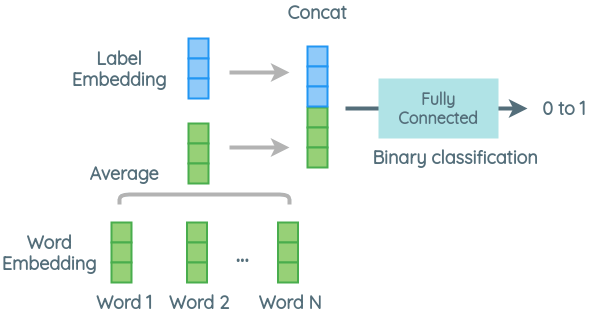

### 🟦 Looking for Hate Speech elements in a given query


In [ ]:
# Define the candidate labels for classification
labels = ['Hate', 'Non-Hate']

# Define the text to be classified
text = query

# Perform zero-shot classification
result = classifier(text, labels)

# Get the top candidate label and its score
top_label = result['labels'][0]
top_score = result['scores'][0]

# Print the result
if top_label == 'hate speech':
    print(f"Text '{text}' is predicted to be hate speech with a confidence score of {top_score}")
else:
    print(f"Text '{text}' is predicted to be non-hate speech with a confidence score of {top_score}")

Text 'Saif ali khan is married to kareena kapoor' is predicted to be non-hate speech with a confidence score of 0.8570337891578674


### 🟦 Looking for Profanity elements in a given query

In [ ]:
# Define the candidate labels for classification
labels = ['Not Profane', 'Profane']

# Define the text to be classified
text = query

# Perform zero-shot classification
result = classifier(text, labels)

# Get the top candidate label and its score
top_label = result['labels'][0]
top_score = result['scores'][0]

if top_label == 'Profane':
    print(f"Text '{text}' contains profanity with a confidence score of {top_score}")
else:
    print(f"Text '{text}' does not contain profanity with a confidence score of {top_score}")


Text 'Saif ali khan is married to kareena kapoor' does not contain profanity with a confidence score of 0.8394144177436829


####🤖 Confidence score indicates the percentage of certainty that the model has estimated it to be belonging to a particular label.

\

## This concludes our code. Hope you enjoyed our project!
### Be sure to fork and star our repo on Github! 😀 😀 😀